# Reading data

In [1]:
import json
import requests

In [2]:
from bullywords import bully_words

In [3]:
twitter_info = {}
word_not_working = None

In [4]:
for bw in bully_words:
    bw_new = bw.replace(" ", "")
    filename = 'info_' + bw_new + '.txt'
    with open(filename) as json_data:
        try:
            d = json.load(json_data)
            twitter_info[bw] = d.get('statuses', [{}])
        except:
            word_not_working = bw
    json_data.close()

In [5]:
bully_words_new = [] 
for i in range(0, len(bully_words)):
    if bully_words[i] == word_not_working:
        p = 0
    else:
        bully_words_new.append(bully_words[i])

In [6]:
print twitter_info['idiot'][0].keys()

[u'contributors', u'truncated', u'text', u'is_quote_status', u'in_reply_to_status_id', u'id', u'favorite_count', u'source', u'retweeted', u'coordinates', u'entities', u'in_reply_to_screen_name', u'id_str', u'retweet_count', u'in_reply_to_user_id', u'favorited', u'user', u'geo', u'in_reply_to_user_id_str', u'lang', u'created_at', u'in_reply_to_status_id_str', u'place', u'metadata']


# Time intervals

In [7]:
import pandas as pd
from datetime import datetime, timedelta, date

In [8]:
def make_datetime(word):
    try:
        tweets = []
        for i in range(0, len(twitter_info[word])):
            create = twitter_info[word][i].get('created_at')
            tweets.append(create)
        tweets = pd.to_datetime(tweets)
        time = tweets
        return time
    except ValueError:
        return None

In [9]:
time = {}
for bw in bully_words_new:
    time[bw] = make_datetime(bw)

In [10]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

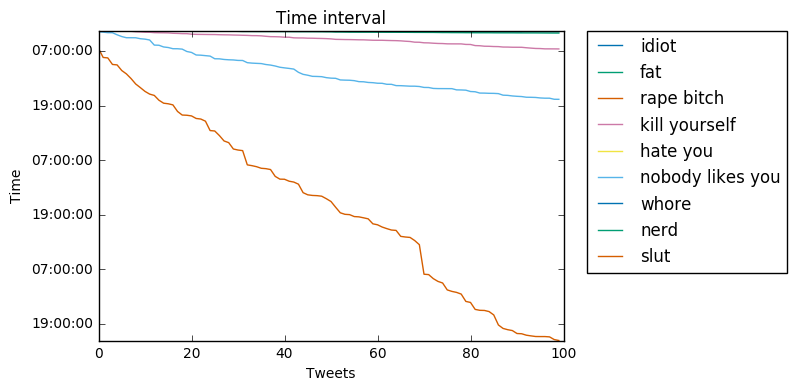

In [11]:
plt.style.use('seaborn-colorblind')
for bw in bully_words_new:
    plt.plot(time[bw], label = bw)
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.xlabel('Tweets')
    plt.ylabel('Time')
    plt.title('Time interval') 

In [12]:
def time_interval_minutes():
    time_interval = {}
    for bw in bully_words_new:
        find_seconds = (time[bw][0] - time[bw][-1]).total_seconds()
        time_interval[bw] = find_seconds/60
    return time_interval

In [13]:
time_intervals = time_interval_minutes()

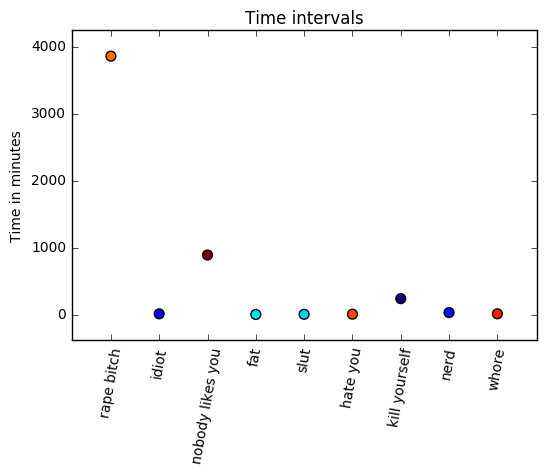

In [14]:
x = range(len(time_intervals))

colors = np.random.rand(len(x))

plt.scatter(x, time_intervals.values(), c=colors, 
            cmap=plt.style.use('seaborn-colorblind'), s = 50)
plt.margins(0.1)
plt.xticks(x, time_intervals.keys(),  rotation=80)
plt.ylabel('Time in minutes')
plt.title('Time intervals')
plt.savefig('time_interval.png', bbox_inches='tight', pad_inches=0.2)

# Retweet count

In [15]:
def count_retweets():
    retweet = {}

    for bw in bully_words_new:
        tweets = []
        for i in range(0, len(twitter_info[bw])):
            create = twitter_info[bw][i].get('retweet_count')
            tweets.append(create)
        retweet[bw]= tweets
    return retweet

In [16]:
retweet_count = count_retweets()

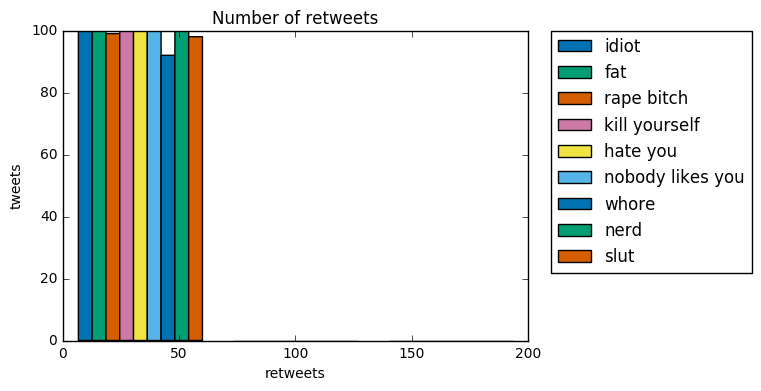

In [17]:
plot_retweet = []
labels = bully_words_new

for bw in bully_words_new:
    plot_retweet.append(retweet_count[bw])

plt.hist(plot_retweet, label=labels)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlim(0, 200)
plt.xlabel('retweets')
plt.ylabel('tweets')
plt.title('Number of retweets')
plt.savefig('retweet.png', bbox_inches='tight', pad_inches=0.2)
plt.show()

# Account counter

In [18]:
from collections import Counter

In [19]:
def no_tweets_made_by_user():
    twitter_id = []
    for bw in bully_words_new:
        for i in range(0, len(twitter_info[bw])):
            create = twitter_info[bw][i].get('user').get('id')
            twitter_id.append(create)
    return Counter(twitter_id)

In [20]:
tweets_per_user = no_tweets_made_by_user()

In [21]:
print tweets_per_user

Counter({3074358755: 5, 703883709922070528: 4, 799730187189370881: 4, 737768296112525312: 3, 745962204093104128: 3, 4781620334: 3, 3474137121: 2, 211065540: 2, 779670468072644608: 2, 4882571533: 2, 1528973690: 2, 836491460249862145: 2, 4439494887: 2, 4385833581: 2, 2984103362: 2, 749324179204349952: 2, 2598599382: 2, 4166546297: 2, 4002348613: 2, 2189799164: 2, 778454690514079744: 2, 2920980348: 2, 2165415840: 2, 828814985824460800: 1, 836206525601361921: 1, 834187659283144706: 1, 450107395: 1, 834708716649869316: 1, 832526819660267525: 1, 824276118941401088: 1, 828386514778333185: 1, 2819209224: 1, 483493897: 1, 2401329162: 1, 788052741604118530: 1, 355790862: 1, 2785849359: 1, 3657035794: 1, 131151891: 1, 585672729: 1, 775221276: 1, 2531338271: 1, 893988896: 1, 829810117403086848: 1, 756949298395348993: 1, 792356675768360966: 1, 152193062: 1, 2467661863: 1, 1369198632: 1, 1683079214: 1, 2680690744: 1, 3236538428: 1, 1425485886: 1, 373870657: 1, 796592745850798082: 1, 8318429540084776

# Account information

In [22]:
def get_num_statuses():    
    num_statuses = {}
    for bw in bully_words_new:
        tweets = []
        for i in range(0, len(twitter_info[bw])):
            create = twitter_info[bw][i].get('user').get('statuses_count')
            tweets.append(create)
        num_statuses[bw] = tweets
    return num_statuses


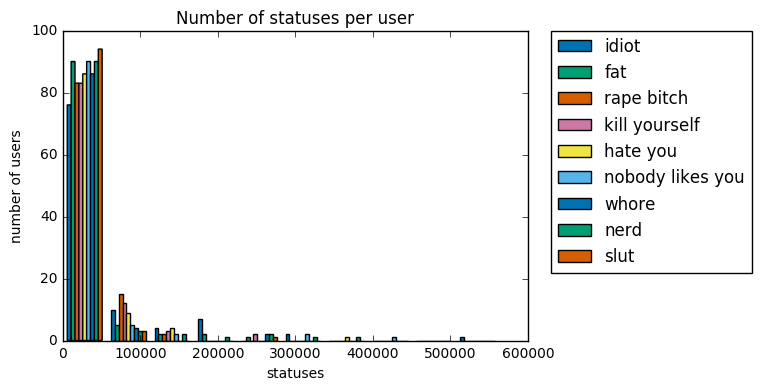

In [23]:
num_statuses = get_num_statuses()
plot_statuses = []

for bw in bully_words_new:
    plot_statuses.append(num_statuses[bw])
    
plt.hist(plot_statuses, label=labels)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel('statuses')
plt.ylabel('number of users')
plt.title('Number of statuses per user')
plt.savefig('statuses.png', bbox_inches='tight', pad_inches=0.2)
plt.show()

## Account age

In [24]:
def acc_created():
    account_made = {}
    for bw in bully_words_new:
        date_made = []
        for i in range(0, len(twitter_info[bw])):
            age = twitter_info[bw][i].get('user').get('created_at')
            age = pd.to_datetime(age)
            date_made.append(age)
        account_made[bw] = date_made
    return account_made

In [25]:
def accAge(word):
    ages = []
    today = date.today()
    for i in range(0, len(twitter_info[word])):
        
        years = today.year - account_made[word][i].year
        months = today.month - account_made[word][i].month
                   
        if today.day < account_made[word][i].day:
            months -= 1
        while months < 0:
            months += 12
            years -= 1
   
        months = float(months)
        ages.append(float(years + (months/12)))
    
    return ages

In [26]:
account_made = acc_created()
acc_age = {}
for bw in bully_words_new:
    acc_age[bw] = accAge(bw)

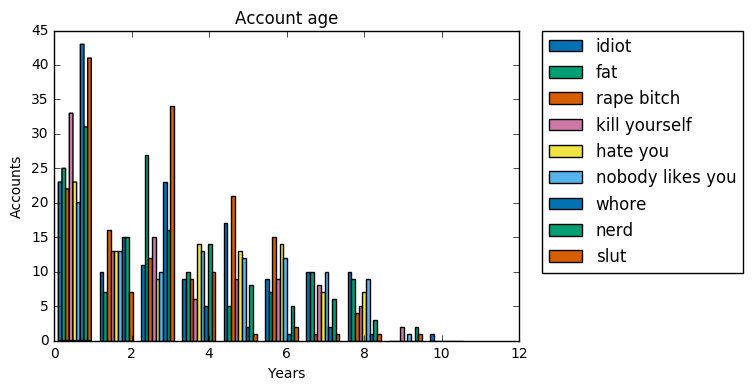

In [27]:
plot_age = []

for bw in bully_words_new:
    plot_age.append(acc_age[bw])

plt.hist(plot_age, label=labels)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel('Years')
plt.ylabel('Accounts')
plt.title('Account age')
plt.savefig('accAge.png', bbox_inches='tight', pad_inches=0.2)
plt.show()

# Print tweets

In [28]:
def print_text(word):
    print 'Tweets containing the word:' + word + '\n'
    for i in range(0, len(twitter_info[word])):
        print twitter_info[word][i].get('text')
        print "---------------------------------"